<a href="https://colab.research.google.com/github/By0nder/QUIMICA_MIDWARJOSECACYATOROCAHUA/blob/main/Semana12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install rdkit
! pip install pyscf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 10.7 MB/s eta 0:00:00


In [2]:
# import these definitions
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True


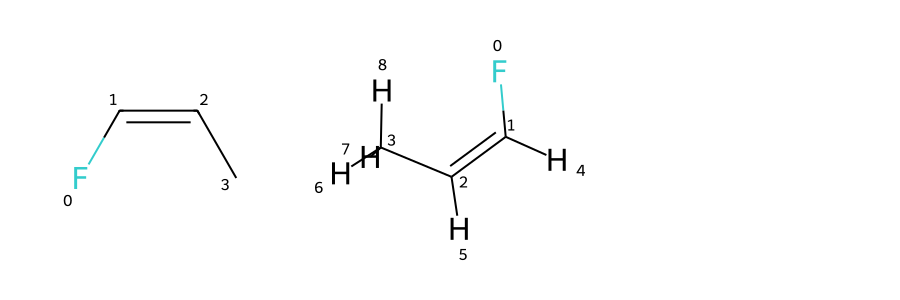

In [3]:
smiles_2 = "F\C=C/C"
#F/C(Br)=C(/Cl)I
mol_izq = Chem.MolFromSmiles(smiles_2)

# Add hydrogens
mol_izqh = Chem.AddHs(mol_izq)
Chem.AllChem.EmbedMolecule(mol_izqh)
# Display both structures

Chem.MolToXYZFile(mol_izqh,"toluene_2.xyz")
Draw.MolsToGridImage([mol_izq, mol_izqh], subImgSize=(300,300))

In [4]:
#Crea una lista con diferentes diedros
diedros = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
mol_lista = []
for i in diedros:
  Chem.AllChem.SetDihedralDeg(mol_izqh.GetConformer(0),1,2,3,6,i)
  #mol_lista.append(mol)
  Chem.MolToXYZFile(mol_izqh, f"{i}.xyz")

In [5]:
from pyscf import gto, dft
# Cargar la molécula desde el archivo XYZ
mol_izqhh = gto.M(atom="toluene_2.xyz")

# Establecer la base de funciones
mol_izqhh.basis = "3-21G"

# Configurar el método de DFT (Kohn-Sham) y la función de intercambio-correlación
mf = dft.KS(mol_izqhh)
mf.xc = 'b3lyp'

# Calcular la energía total
energy_1 = mf.kernel()

# Imprimir la energía total
print("Energía total de los reactivos es: ", energy_1)

/usr/local/lib/python3.10/dist-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -214.251651928338
Energía total de los reactivos es:  -214.25165192833754


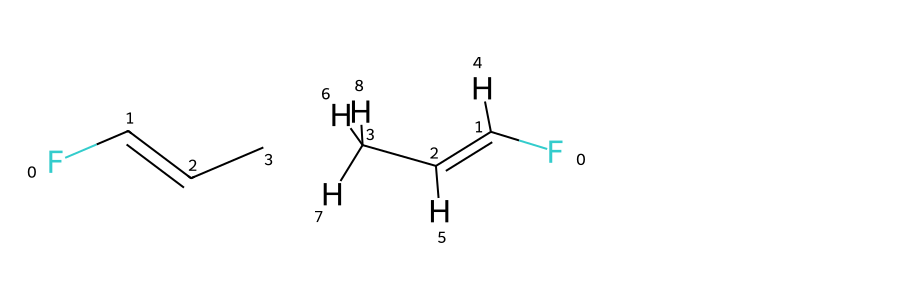

In [9]:
#SMILES notation for the molecule
smiles = "F/C=C/C"

# Create a molecule from the SMILES notation
mol = Chem.MolFromSmiles(smiles)

# Add hydrogens to the molecule
mol_h = Chem.AddHs(mol)

# Generate a 3D conformer for the molecule
Chem.AllChem.EmbedMolecule(mol_h)

# Save the molecule in XYZ format for future use
Chem.MolToXYZFile(mol_h, "toluene.xyz")
Draw.MolsToGridImage([mol, mol_h], subImgSize=(300,300))

In [10]:
#Crea una lista con diferentes diedros
diedros = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
mol_lista = []
for i in diedros:
  Chem.AllChem.SetDihedralDeg(mol_h.GetConformer(0),1,2,3,6,i)
  #mol_lista.append(mol)
  Chem.MolToXYZFile(mol_h, f"{i}.xyz")

In [11]:
#Crea una lista con diferentes diedros
diedros = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
mol_lista = []
for i in diedros:
  Chem.AllChem.SetDihedralDeg(mol_h.GetConformer(0),1,2,3,6,i)
  #mol_lista.append(mol)
  Chem.MolToXYZFile(mol_h, f"{i}.xyz")

In [19]:
import numpy as np
from pyscf import gto, dft

# Función para calcular la energía y manejar errores
def calcular_energia(mol):
    try:
        # Configurar el método de DFT (Kohn-Sham) y la función de intercambio-correlación
        mf = dft.KS(mol)
        mf.xc = 'b3lyp'

        # Calcular la energía total
        energy = mf.kernel()

        # Imprimir la energía total
        print("¡Cálculo exitoso :D!")
        print("Energía total de los productos es:", energy)
    except Exception as e:
        print("¡Ups! Algo salió mal al calcular la energía.")
        print("Error:", e)

# Cargar la molécula desde el archivo XYZ
mol_hh = gto.M(atom="toluene.xyz")

# Establecer la base de funciones
mol_hh.basis = "3-21G"

# Calcular la energía total y manejar errores
calcular_energia(mol_hh)


converged SCF energy = -214.251852671681
¡Cálculo exitoso!
Energía total de los productos es: -214.25185267168143


In [13]:
energia_activacion = energy - energy_1
print("La energia de activacion es: ", energia_activacion)
print("La reacion es exotermica")


La energia de activacion es:  -0.00020074334361197543
La reacion es exotermica


In [15]:
!pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams


  Cloning https://github.com/giacomomarchioro/PyEnergyDiagrams to /tmp/pip-req-build-clnz6x6z
  Running command git clone --filter=blob:none --quiet https://github.com/giacomomarchioro/PyEnergyDiagrams /tmp/pip-req-build-clnz6x6z
  Resolved https://github.com/giacomomarchioro/PyEnergyDiagrams to commit 3d6086564aa99aa0a0f3db4a510b736015562d5c
  Preparing metadata (setup.py) ... done
  Created wheel for energydiagram: filename=energydiagram-0.2.0-py3-none-any.whl size=9466 sha256=9cd3e542269648877faedc36033004942eac7de600412259f6196994daa638cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-8ryw9ea0/wheels/fd/36/8c/10ed87cd41f9638b1e3a44dabe7e1e185131d967ea6ed395cf
Successfully built energydiagram


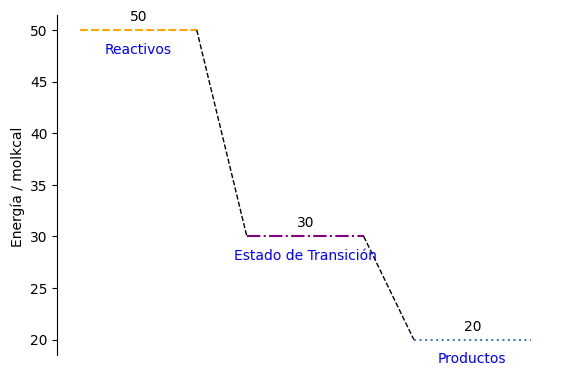

In [18]:
import matplotlib.pyplot as plt
from energydiagram import ED

# Valores de energía (reemplaza energy_1 y energy con tus valores)
energia_reactivos = 50
energia_productos = 20

energia_activacion = energia_reactivos - energia_productos

diagram = ED()

diagram.add_level(energia_reactivos, 'Reactivos', color='#FFA500', linestyle='--')  # Cambio de color y estilo
diagram.add_level(energia_activacion, 'Estado de Transición', color='purple', linestyle='-.')  # Cambio de color y estilo
diagram.add_level(energia_productos, 'Productos', color='#4682B4', linestyle=':')  # Cambio de color y estilo

diagram.add_link(0, 1)
diagram.add_link(1, 2)

diagram.plot(ylabel="Energía / molkcal ")
plt.show()
